# MVP

The data used are for Jan, Feb & Mar of 2021

In [37]:
import pandas as pd 
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 210327]
turnstiles_df = get_data(week_nums)

In [39]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [40]:
turnstiles_daily["DAILY_ENTRIES"] = (turnstiles_daily
                                     .groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]]
                                     .diff())
turnstiles_daily.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/03/2021,7512008,355.0
2,A002,R051,02-00-00,59 ST,01/04/2021,7512222,214.0
3,A002,R051,02-00-00,59 ST,01/05/2021,7512764,542.0
4,A002,R051,02-00-00,59 ST,01/06/2021,7513302,538.0
5,A002,R051,02-00-00,59 ST,01/07/2021,7513798,496.0


In [41]:
turnstiles_daily[(turnstiles_daily.ENTRIES ==0) & (turnstiles_daily.DAILY_ENTRIES < 0)]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
66633,H007A,R248,02-05-00,1 AV,02/16/2021,0,-262584.0
93029,N012,R035,01-05-00,168 ST,02/21/2021,0,-11.0
103586,N049,R084,01-05-01,59 ST COLUMBUS,02/05/2021,0,-589824.0
133927,N114,R297,01-05-01,FRANKLIN AV,03/04/2021,0,-67108864.0
143733,N181A,R464,00-05-00,AQUEDUCT RACETR,02/15/2021,0,-393218.0
236886,PTH02,R544,00-06-03,HARRISON,02/13/2021,0,-449.0
238214,PTH03,R552,00-01-01,JOURNAL SQUARE,01/28/2021,0,-5199.0
246221,PTH11,R545,00-00-02,14TH STREET,02/12/2021,0,-569087.0
246223,PTH11,R545,00-00-02,14TH STREET,02/14/2021,0,-131.0
246231,PTH11,R545,00-00-02,14TH STREET,02/22/2021,0,-3782.0


In [42]:
turnstiles_daily[(turnstiles_daily.ENTRIES != 0) & (turnstiles_daily.DAILY_ENTRIES < 0)]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
416,A002,R051,02-03-02,59 ST,03/23/2021,299,-6641139.0
3275,A011,R080,01-03-00,57 ST-7 AV,01/03/2021,885629423,-127.0
3276,A011,R080,01-03-00,57 ST-7 AV,01/04/2021,885629327,-96.0
3277,A011,R080,01-03-00,57 ST-7 AV,01/05/2021,885629131,-196.0
3278,A011,R080,01-03-00,57 ST-7 AV,01/06/2021,885628901,-230.0
...,...,...,...,...,...,...,...
415504,R730,R431,00-00-04,EASTCHSTER/DYRE,03/22/2021,1559819443,-54.0
415505,R730,R431,00-00-04,EASTCHSTER/DYRE,03/23/2021,1559819287,-156.0
415506,R730,R431,00-00-04,EASTCHSTER/DYRE,03/24/2021,1559819090,-197.0
415507,R730,R431,00-00-04,EASTCHSTER/DYRE,03/25/2021,1559818905,-185.0


In [43]:
turnstiles_daily["FIXED_DAILY_ENTRIES"]=(
np.where((
    (turnstiles_daily.ENTRIES ==0) & (turnstiles_daily.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET0 
    , 
    np.where((turnstiles_daily.ENTRIES !=0) & (turnstiles_daily.DAILY_ENTRIES < 0)
             , abs(turnstiles_daily.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
         turnstiles_daily.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))

In [44]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['FIXED_DAILY_ENTRIES']].sum().reset_index()

In [45]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['FIXED_DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,FIXED_DAILY_ENTRIES
0,1 AV,01/03/2021,3691.0
1,1 AV,01/04/2021,2525.0
2,1 AV,01/05/2021,5328.0
3,1 AV,01/06/2021,5468.0
4,1 AV,01/07/2021,5610.0


In [46]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('FIXED_DAILY_ENTRIES', ascending=False)\
    .reset_index()

Text(0.5, 1.0, 'Top 10')

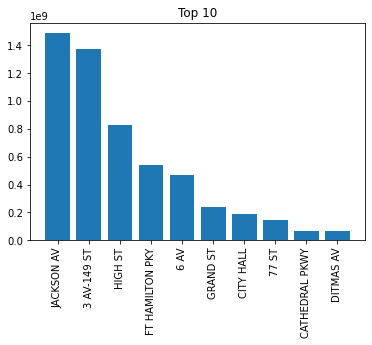

In [47]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['FIXED_DAILY_ENTRIES'][:10])
plt.xticks(rotation=90);
plt.title('Top 10')

- the figure shows a graph of the Top 10 Stations that have the maximum entries based on the data from MTA Turnstile
- To avoid data mistakes, I use a condition to fix the negative entries

